# BCE Loss with Logits

Why? Numerical instability. Exponentiating things leads to very large numbers (larger than a computer can represent).

In [18]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [20]:
# Load the data
data = load_breast_cancer()

type(data)

sklearn.utils.Bunch

In [21]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [22]:
# 'data' attribute means input data
# it has 569 samples and 30 features
data.data.shape

(569, 30)

In [23]:
# note how the targets are just 0s and 1s
# normally, you have K targets, they are labeled 0,...,K-1
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [24]:
# the target meanings are not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [25]:
# there are 569 corresponding targets
data.target.shape

(569,)

In [26]:
# feature names
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [27]:
# use sklearn to split data into train/test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [28]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Build the model
model = nn.Linear(D, 1)

In [30]:
# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [31]:
# Convert data into torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

In [32]:
# Train the model
n_epochs = 1000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
train_acc = np.zeros(n_epochs)
test_acc = np.zeros(n_epochs)

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)
    
  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()
    
  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 50/1000, Train Loss: 0.5503, Test Loss: 0.5565
Epoch 100/1000, Train Loss: 0.3936, Test Loss: 0.4111
Epoch 150/1000, Train Loss: 0.3106, Test Loss: 0.3362
Epoch 200/1000, Train Loss: 0.2592, Test Loss: 0.2895
Epoch 250/1000, Train Loss: 0.2242, Test Loss: 0.2568
Epoch 300/1000, Train Loss: 0.1987, Test Loss: 0.2325
Epoch 350/1000, Train Loss: 0.1793, Test Loss: 0.2135
Epoch 400/1000, Train Loss: 0.1640, Test Loss: 0.1985
Epoch 450/1000, Train Loss: 0.1516, Test Loss: 0.1862
Epoch 500/1000, Train Loss: 0.1414, Test Loss: 0.1761
Epoch 550/1000, Train Loss: 0.1328, Test Loss: 0.1676
Epoch 600/1000, Train Loss: 0.1254, Test Loss: 0.1605
Epoch 650/1000, Train Loss: 0.1190, Test Loss: 0.1543
Epoch 700/1000, Train Loss: 0.1134, Test Loss: 0.1491
Epoch 750/1000, Train Loss: 0.1085, Test Loss: 0.1445
Epoch 800/1000, Train Loss: 0.1041, Test Loss: 0.1404
Epoch 850/1000, Train Loss: 0.1001, Test Loss: 0.1369
Epoch 900/1000, Train Loss: 0.0966, Test Loss: 0.1337
Epoch 950/1000, Train Loss: 0

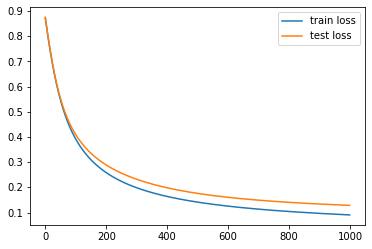

In [33]:
# Plot the train and test losses per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()

In [34]:
# Get accuracy
with torch.no_grad():
  p_train = model(X_train)
  p_train = (p_train.numpy() > 0)
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = (p_test.numpy() > 0)
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9869, Test acc: 0.9681


0.9868766404199475


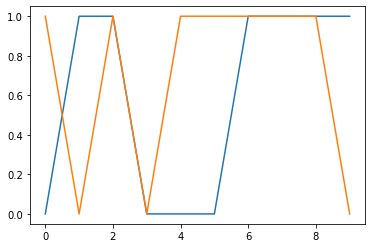

In [35]:
print(train_acc)
# Plot the train and test accuracies per iteration
plt.plot(p_train[0:10], label='train acc')
plt.plot(p_test[0:10], label='test acc')

# Not very informative!

In [36]:
# check out the state dict
# model.state_dict()

In [37]:
# Save the model
# torch.save(model.state_dict(), 'lin_class_logits_model.pt')

In [38]:
# !ls

In [39]:
# Load the model
# Note: this makes more sense and is more compact when
# your model is a big class, as we will be seeing later.
# model2 = nn.Sequential(
#     nn.Linear(D, 1),
#     nn.Sigmoid()
# )
# model2.load_state_dict(torch.load('lin_class_logits_model.pt'))

In [40]:
# Evaluate the new model
# Results should be the same!
# with torch.no_grad():
#   p_train = model2(X_train)
#   p_train = np.round(p_train.numpy())
#   train_acc = np.mean(y_train.numpy() == p_train)

#   p_test = model2(X_test)
#   p_test = np.round(p_test.numpy())
#   test_acc = np.mean(y_test.numpy() == p_test)
# print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")